# Ensemble Learning

This notebook will demonstrate ensemble learning on the [Concrete strength](dataset/Concrete_Data.csv) dataset through the use of Random Forests.

In [2]:
#Always include important imports at the top
import numpy as np #for linear algebra functions
import pandas as pd #for data processing the CSV
import time

#visualization
import seaborn as sns 
import matplotlib.pyplot as plt

#sklearn imports
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report #for nice result formatting
from sklearn.metrics import roc_curve, roc_auc_score

#importing a dataset into a dataframe
df = pd.read_csv("/Users/vinodk/Documents/Rice Univeristy/4th semster/Data Science and ML /INDE 577 Repository/Data-Science-and-Machine-Learning-INDE-577---Spring-2024-/Supervised Learning/8_Ensemble Random Forest/dataset/Concrete_Data.csv")

## Pre-Processing

Before we can run ensemble learning, we need to pre-process the data and encode labels. We will do this using sklearn's preprocessing package.

In [3]:
# Show the first 5 rows of the dataset
print(df.head())
print("Target Variable is Strength (Compressive strength of Concrete in MPa)")

   Cement   Slag  Ash  Water  Superplasticizer  Coarse   Fine  Age  Strength
0   540.0    0.0  0.0  162.0               2.5  1040.0  676.0   28     79.99
1   540.0    0.0  0.0  162.0               2.5  1055.0  676.0   28     61.89
2   332.5  142.5  0.0  228.0               0.0   932.0  594.0  270     40.27
3   332.5  142.5  0.0  228.0               0.0   932.0  594.0  365     41.05
4   198.6  132.4  0.0  192.0               0.0   978.4  825.5  360     44.30
Target Variable is Strength (Compressive strength of Concrete in MPa)


In [4]:
df.describe()

,Cement,Slag,Ash,Water,Superplasticizer,Coarse,Fine,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
df.isnull().sum()

Cement              0
Slag                0
Ash                 0
Water               0
Superplasticizer    0
Coarse              0
Fine                0
Age                 0
Strength            0
dtype: int64

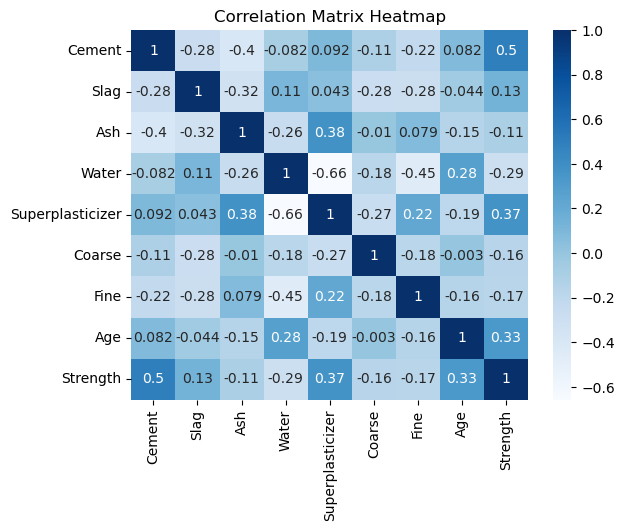

In [6]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [7]:
# Importing the required library
from sklearn.model_selection import train_test_split

# Splitting the data into features and target variable
features = df.iloc[:, :-1]  # All columns except the last one for features
target = df.iloc[:, -1]  # The last column for the target variable (Strength)

# Splitting the dataset into training and testing sets
# Test size is 30% and train size is 70% with a fixed random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Optional: Verify the size of the training and testing sets
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)


Training set size: (721, 8) (721,)
Testing set size: (309, 8) (309,)


In [8]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3, random_state=42)

In [9]:
# Importing necessary libraries for Random Forest and K-Fold Cross-Validation
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Building a Random Forest model with 150 trees and a fixed random state for reproducibility
rf = RandomForestRegressor(n_estimators=150, random_state=42)

# Fit the Random Forest model to the training data
rf.fit(X_train, y_train)

# Perform K-Fold Cross-Validation with 5 folds
# The scoring parameter is set to 'r2', which is the R-squared metric
k = 5  # Number of folds
cv_results = cross_val_score(rf, X_train, y_train, cv=k, scoring='r2')

# Output the cross-validation results
print("Cross-Validation R-squared Scores:", cv_results)
print("Average R-squared Score:", cv_results.mean())


Cross-Validation R-squared Scores: [0.91787785 0.89700911 0.90427667 0.87641586 0.90367919]
Average R-squared Score: 0.8998517343442739


In [10]:
# Import necessary libraries for metric calculations
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate the predictions for the training set
y_pred_train = rf.predict(X_train)

# Compute training error metrics
# Mean Absolute Percentage Error (MAPE)
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

# Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_pred_train)

# Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_pred_train)

# R-squared Score (R2)
r2_train = r2_score(y_train, y_pred_train)

# Calculate the predictions for the testing set
y_pred_test = rf.predict(X_test)

# Compute testing error metrics
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Display the results for training and testing sets
print("Training MAPE: {:.2f}%, MAE: {:.2f}, MSE: {:.2f}, R2: {:.2f}".format(mape_train, mae_train, mse_train, r2_train))
print("Testing MAPE: {:.2f}%, MAE: {:.2f}, MSE: {:.2f}, R2: {:.2f}".format(mape_test, mae_test, mse_test, r2_test))

# Display K-Fold Cross-Validation R2 scores
print("K-Fold CV R2 Scores:", cv_results)
print("Mean K-Fold CV R2: {:.2f}".format(np.mean(cv_results)))


Training MAPE: 4.79%, MAE: 1.35, MSE: 4.12, R2: 0.99
Testing MAPE: 12.76%, MAE: 3.73, MSE: 29.66, R2: 0.89
K-Fold CV R2 Scores: [0.91787785 0.89700911 0.90427667 0.87641586 0.90367919]
Mean K-Fold CV R2: 0.90


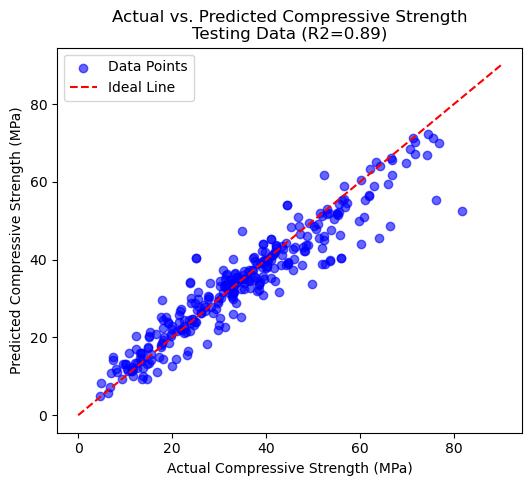

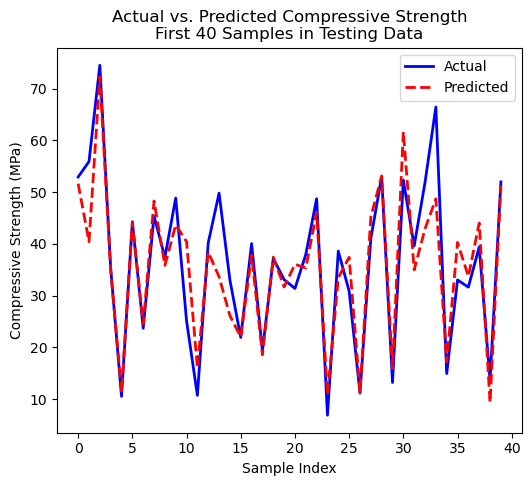

In [11]:
# Plotting actual vs. predicted values for testing data
plt.figure(figsize=(6, 5))  # Set figure size for a clear plot
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.6, label='Data Points')  # Actual vs. Predicted scatter plot
plt.plot([0, 90], [0, 90], 'r--', label='Ideal Line')  # Ideal line showing perfect prediction
plt.xlabel('Actual Compressive Strength (MPa)')  # Label for x-axis
plt.ylabel('Predicted Compressive Strength (MPa)')  # Label for y-axis
plt.title('Actual vs. Predicted Compressive Strength\nTesting Data (R2={:.2f})'.format(r2_test))  # Title with R2 score
plt.legend()  # Display legend
plt.show()  # Display the plot

# Plotting actual vs. predicted values for first 40 samples in testing data
n_samples = 40  # Number of samples to plot
indices = np.arange(n_samples)  # Generate indices for the samples
plt.figure(figsize=(6, 5))  # Set figure size for clarity
plt.plot(indices, y_test[:n_samples], 'b-', linewidth=2, label='Actual')  # Line plot for actual values
plt.plot(indices, y_pred_test[:n_samples], 'r--', linewidth=2, label='Predicted')  # Line plot for predicted values
plt.xlabel('Sample Index')  # Label for x-axis
plt.ylabel('Compressive Strength (MPa)')  # Label for y-axis
plt.title('Actual vs. Predicted Compressive Strength\nFirst {} Samples in Testing Data'.format(n_samples))  # Title
plt.legend()  # Show legend
plt.show()  # Display the plot


The Random Forest Regressor demonstrated an ability to predict the compressive strength of concrete with a mean absolute percentage error (MAPE) of 12.78%.  The test mean squared error (MSE) for the Random Forest model is 29.76, a significant improvement over the MSE of 98.27 reported for the Single Neuron Linear Regression model. This suggests that the Random Forest model, with its ensemble learning approach, 
is more accurate for predicting the compressive strength of concrete in this dataset.